### 1.4: Some statistics with pandas

In [1]:
# import moduled
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. Load in the SF crimes dataset:

In [59]:
crime = pd.read_csv('sf_crime.csv')
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 9 columns):
Dates         25000 non-null object
Category      25000 non-null object
Descript      25000 non-null object
DayOfWeek     25000 non-null object
PdDistrict    25000 non-null object
Resolution    25000 non-null object
Address       25000 non-null object
X             25000 non-null float64
Y             25000 non-null float64
dtypes: float64(2), object(7)
memory usage: 1.7+ MB


#### 2. Print the head

In [58]:
crime.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2003-03-23 23:27:00,ARSON,ARSON OF A VEHICLE,Sunday,BAYVIEW,NONE,0 Block of HUNTERS PT EXPWY EX,-122.376945,37.733018
1,2006-03-07 06:45:00,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Tuesday,NORTHERN,NONE,0 Block of MARINA BL,-122.432952,37.805052
2,2004-03-06 03:00:00,NON-CRIMINAL,LOST PROPERTY,Saturday,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421
3,2011-12-03 12:10:00,BURGLARY,"BURGLARY OF STORE, UNLAWFUL ENTRY",Saturday,TARAVAL,"ARREST, BOOKED",3200 Block of 20TH AV,-122.475647,37.728528
4,2003-01-10 00:15:00,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Friday,NORTHERN,NONE,POLK ST / BROADWAY ST,-122.421772,37.795946


#### 3. Print the unique categories and how many there are

In [42]:
crime['Category'].value_counts()

LARCENY/THEFT                  4934
OTHER OFFENSES                 3656
NON-CRIMINAL                   2601
ASSAULT                        2164
DRUG/NARCOTIC                  1533
VEHICLE THEFT                  1506
VANDALISM                      1280
WARRANTS                       1239
BURGLARY                       1023
SUSPICIOUS OCC                  891
MISSING PERSON                  771
ROBBERY                         630
FRAUD                           537
SECONDARY CODES                 283
FORGERY/COUNTERFEITING          281
WEAPON LAWS                     255
PROSTITUTION                    223
TRESPASS                        209
STOLEN PROPERTY                 137
SEX OFFENSES FORCIBLE           120
DRUNKENNESS                     105
DISORDERLY CONDUCT              105
RECOVERED VEHICLE                80
DRIVING UNDER THE INFLUENCE      75
KIDNAPPING                       71
RUNAWAY                          58
ARSON                            52
LIQUOR LAWS                 

#### 4. Print the unique districts and how many there are

In [43]:
crime['PdDistrict'].value_counts()

SOUTHERN      4413
MISSION       3416
NORTHERN      3076
BAYVIEW       2555
CENTRAL       2424
TENDERLOIN    2336
INGLESIDE     2256
TARAVAL       1804
PARK          1438
RICHMOND      1282
Name: PdDistrict, dtype: int64

#### 5. Make a DataFrame of the crime categories and the number of crimes per category

In [48]:
categories = crime.groupby('Category')
categories.count()

,Dates,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
Category,,,,,,,,
ARSON,52,52,52,52,52,52,52,52
ASSAULT,2164,2164,2164,2164,2164,2164,2164,2164
BAD CHECKS,14,14,14,14,14,14,14,14
BRIBERY,8,8,8,8,8,8,8,8
BURGLARY,1023,1023,1023,1023,1023,1023,1023,1023
DISORDERLY CONDUCT,105,105,105,105,105,105,105,105
DRIVING UNDER THE INFLUENCE,75,75,75,75,75,75,75,75
DRUG/NARCOTIC,1533,1533,1533,1533,1533,1533,1533,1533
DRUNKENNESS,105,105,105,105,105,105,105,105


#### 6. Make a DataFrame of the districts and crime counts per district

In [49]:
districts = crime.groupby('PdDistrict')
districts.count()

,Dates,Category,Descript,DayOfWeek,Resolution,Address,X,Y
PdDistrict,,,,,,,,
BAYVIEW,2555,2555,2555,2555,2555,2555,2555,2555
CENTRAL,2424,2424,2424,2424,2424,2424,2424,2424
INGLESIDE,2256,2256,2256,2256,2256,2256,2256,2256
MISSION,3416,3416,3416,3416,3416,3416,3416,3416
NORTHERN,3076,3076,3076,3076,3076,3076,3076,3076
PARK,1438,1438,1438,1438,1438,1438,1438,1438
RICHMOND,1282,1282,1282,1282,1282,1282,1282,1282
SOUTHERN,4413,4413,4413,4413,4413,4413,4413,4413
TARAVAL,1804,1804,1804,1804,1804,1804,1804,1804


#### 7. Make a DataFrame of the day of week and crime counts per day

In [50]:
weekday = crime.groupby('DayOfWeek')
weekday.count()

,Dates,Category,Descript,PdDistrict,Resolution,Address,X,Y
DayOfWeek,,,,,,,,
Friday,3883,3883,3883,3883,3883,3883,3883,3883
Monday,3524,3524,3524,3524,3524,3524,3524,3524
Saturday,3496,3496,3496,3496,3496,3496,3496,3496
Sunday,3313,3313,3313,3313,3313,3313,3313,3313
Thursday,3579,3579,3579,3579,3579,3579,3579,3579
Tuesday,3548,3548,3548,3548,3548,3548,3548,3548
Wednesday,3657,3657,3657,3657,3657,3657,3657,3657


#### 8. Describe one of the datasets

In [51]:
weekday.describe()

X            Y
DayOfWeek                                
Friday    count  3883.000000  3883.000000
          mean   -122.422626    37.767763
          std       0.025160     0.024008
          min    -122.513642    37.708533
          25%    -122.433409    37.753494
          50%    -122.416469    37.775421
          75%    -122.406539    37.784905
          max    -122.364937    37.810204
Monday    count  3524.000000  3524.000000
          mean   -122.421798    37.781423
          std       0.040611     0.880220
          min    -122.511054    37.708311
          25%    -122.431952    37.751659
          50%    -122.416978    37.774822
          75%    -122.407141    37.784089
          max    -120.500000    90.000000
Saturday  count  3496.000000  3496.000000
          mean   -122.422770    37.767931
          std       0.025334     0.024442
          min    -122.511557    37.708200
          25%    -122.433437    37.753829
          50%    -122.416294    37.775421
          75%    -122.406539    37.784697
          max    -122.364937    37.810204
Sunday    count  3313.000000  3313.000000
          mean   -122.421881    37.783613
          std       0.041552     0.907786
          min    -122.511054    37.708170
          25%    -122.432282    37.753924
          50%    -122.416667    37.775421
          75%    -122.407244    37.784907
          max    -120.500000    90.000000
Thursday  count  3579.000000  3579.000000
          mean   -122.422712    37.766867
          std       0.025037     0.024205
          min    -122.513642    37.708154
          25%    -122.433250    37.752534
          50%    -122.416491    37.775421
          75%    -122.406959    37.784353
          max    -122.365565    37.814691
Tuesday   count  3548.000000  3548.000000
          mean   -122.422846    37.781494
          std       0.041421     0.877235
          min    -122.513642    37.708258
          25%    -122.432915    37.752884
          50%    -122.416343    37.775421
          75%    -122.407242    37.784189
          max    -120.500000    90.000000
Wednesday count  3657.000000  3657.000000
          mean   -122.422488    37.766758
          std       0.024842     0.024053
          min    -122.510340    37.708003
          25%    -122.432143    37.752250
          50%    -122.416452    37.775421
          75%    -122.407474    37.784150
          max    -122.364937    37.810204

#### 9. Calculate the mean difference between the experimental and control below

In [52]:
control = [4.8,17.3,7.0,10.8,9.4,2.6,9.0,9.6,12.7,8.5,15.8,11.0,9.7,13.1,6.3,4.4,7.8,
           9.9,7.8,7.7,12.8,13.2,6.1,7.1,6.4,11.7,11.8,6.3,14.4,9.8,14.9,11.4,9.1,10.4,
           13.2,10.0,13.5,10.1,15.0,8.8,5.3,15.1,7.6,9.9,4.9,9.2,12.3,12.1,6.9,8.3,7.0,
           6.1,13.4,11.5,6.0,12.3,5.6,14.7,3.7,7.6,10.9,10.3,10.3,10.2,7.1,6.3,13.2,9.9,
           10.6,9.8,4.9,16.9,9.1,6.7,12.2,8.2,10.1,15.5,11.9,9.7,7.9,13.4,10.6,7.9,13.1,
           11.9,11.6,2.9,13.9,14.4,8.6,7.6,8.3,12.0,5.2,7.1,13.6,6.5,9.9,14.8]

In [53]:
experimental = [15.4,14.7,14.0,25.3,15.1,14.6,0.0,20.5,16.9,18.9,20.1,16.5,13.1,16.4,
                18.3,21.3,6.3,9.0,12.1,7.4,25.6,10.8,11.4,12.1,22.7,20.1,18.3,9.4,11.0,
                14.8,12.5,12.3,16.4,13.3,14.1,15.7,12.2,15.2,16.9,1.5,18.6,4.2,12.2,8.2,
                15.3,9.3,12.0,22.8,19.7,10.7,17.8,15.4,14.5,22.2,16.7,19.3,17.1,17.4,5.4,
                10.9,13.7,17.1,11.2,15.0,18.2,14.2,11.0,19.6,10.9,13.9,17.3,11.1,19.9,
                11.2,25.1,23.7,16.5,17.9,20.1,15.8,26.4,17.7,18.9,5.6,25.6,10.4,15.5,17.7,
                22.9,18.9,21.2,5.5,13.2,13.4,21.9,11.1,13.7,16.9,16.4,18.8 ]

In [54]:
mean_diff = np.mean(experimental) - np.mean(control)
print mean_diff

5.413


#### 10. Calculate the t-statistic for the difference between means by hand (if you forgot it, look it up online or in the notes!)

The standard deviation component is the standard deviation across groups.

In [56]:
t_stat = mean_diff/np.sqrt((np.var(experimental)/len(experimental))+(np.var(control)/len(control)))
print t_stat

8.8216780793


#### 11. Plot the control and experimental distributions using seaborn on the same plot (with different colors for each)

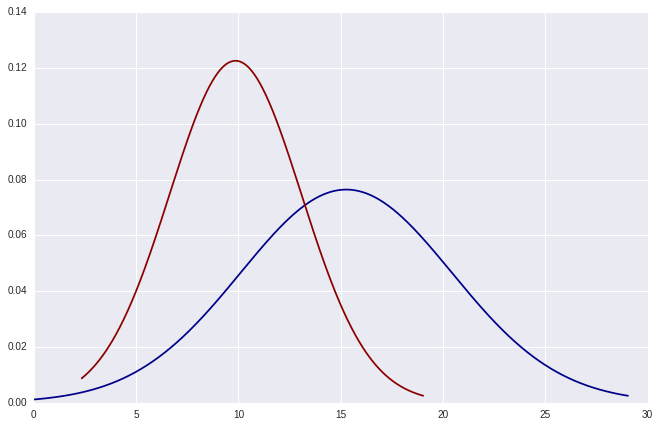

In [69]:
xpoints_e = np.linspace(min(experimental)*.9,max(experimental)*1.1,500)
ypoints_e = stats.t.pdf(xpoints_e,len(experimental),np.mean(experimental),np.std(experimental))
xpoints_c = np.linspace(min(control)*.9,max(control)*1.1,500)
ypoints_c = stats.t.pdf(xpoints_c,len(control),np.mean(control),np.std(control)) 
fig = plt.figure(figsize=(11,7))
ax = fig.gca()
ax.plot(xpoints_e,ypoints_e, color = 'darkblue')
ax.plot(xpoints_c,ypoints_c, color = 'darkred')

#### 11. [BONUS] Write a function to bootstrap the 99% confidence interval for the t-statistic.

Look up: np.percentile!

In [ ]:
def 99_CI(t):
    